<center><title> Multi-classification Model with Stock Dataset:</title></center> 
<center><h2>When to Buy, Sell, and Hold</h2></center>

<center><h3>What publicly traded stocks are currently overbought, oversold, or neither?</h3></center>
<h3><b>Methodology<b>: OSEMN </h3>
<h6>We will use the OSEMN process to help an independent stock investors select the top 5 best stocks to buy.</h6>
    <br>
<li>1. Obtain Data</li>
<li>2. Scrub Data</li>
<li>3. Explore Data</li>
<li>4. Model Data</li>
<li>5. Interpreting Data</li>

First, will use python and two open source web scrapping libraries to obtain the stock data. We will then scrub the data by checking for missing values and duplicates. Afterwards, we will analyze the features and visualize the dataset. We will perform a train-test-split on the data; standardize the dataset, perform a Priciple Component Analysis on the features; build a baseline model; build additional classification models; and compare all models by testing the accuracy of each model's predicitons. 

### Adding Some CSS Before We Start

We have a lot of data to go through, so I figured adding some style would help make it easier on the technical eye.

In [1]:
%%html
<style>
h1{
  width: 100%;
  height: 100%;
  border-style: solid;
  border-color: green;
  background-color: lightred;
  text-align: center;
  animation: example 4s infinite;
}

@keyframes example {
  0%   {background-color: Tomato;color: white;}
  25%  {background-color: MediumSeaGreen;color: white;}
  50%  {background-color: Tomato;color:white;}
  100% {background-color: MediumSeaGreen;color:white;}
}

#tbc {
  text-align: left;
}
</style>

<h1> Obtain </h1?

The first step in our process begins with <b>obtaining</b> the data we need. We used a combination of the request's library, beautifulsoup, and pandas to scrape data for each company. This process was broken up in three task. (1) Fundamental, (2) Indicator Data, (3) Combining Data. 

The first task was to scrape fundamental data for each stock. This inculded most of the information available on each company's Yahoo Finance page, ie: current price, previous close price, open price, volume, market_cap, etc.

The second task was broken down into two sub-task. In the first sub-task, we looked at each companies historic time series data, like adjusted close, price change over time, and added features to include adjusted close, average gain, average loss. In the second sub tasked we looked at relative stregnth, relative stregnth index, and the target variable. 

The last step was combining the datasets based on stock ticker names. This dataset combines fundamental and indicator data for the publicly trades stocks predicting if the stocks are currently overbought or oversold, or neither.

Below, we will load the libraries and the data we obtained:

## Importing Libraries

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Loading the data

In [3]:
df = pd.read_csv('Stock_Dataset_13.csv', index_col='asset')
df.head()

,current_price,prev_close,opens,bids,ask,day_range_min,day_range_max,fifty_two_wk_min,fifty_two_wk_max,volume,avg_volume,market_cap,beta,PE_ratio,eps,earnings_date_min,earnings_date_max,dividend_yield,dividend_date,one_year_est,RSI,Adj_Close,Change,Gain,Loss,AVG_gain,AVG_Loss,RS,target
asset,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
(BAC),25.71,26.78,25.47,25480.0,25480.0,25.10,26.21,25.10,35.72,118919348.0,54549159.0,224.411,1.63,9.35,2.750,A,p,"['0.72', '(2.69%)']","Mar 04, 2020",36.67,21.058353,25.71,-1.07,0.00,1.07,0.145305,0.544708,0.266758,0.0
(AMD),48.59,48.11,49.44,47640.0,47670.0,46.74,49.54,21.04,59.27,124590861.0,61645381.0,56.834,2.83,161.97,0.300,"Apr 27, 2020","May 03, 2020","['N/A', '(N/A)']","Apr 26, 1995",49.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(F),6.49,6.74,6.60,6480.0,6490.0,6.40,6.68,6.40,10.56,107125744.0,60397322.0,25.732,1.16,649.00,0.010,A,p,"['0.60', '(8.90%)']","Jan 28, 2020",9.36,20.849677,6.49,-0.25,0.00,0.25,0.033049,0.125463,0.263419,0.0
(ABEV),3.33,3.31,3.25,3260.0,3430.0,3.24,3.36,3.10,5.45,84110179.0,25497170.0,52.621,0.63,18.92,0.176,N,/,"['0.12', '(3.65%)']","Dec 19, 2019",4.60,31.614116,3.33,0.02,0.02,0.00,0.023124,0.050020,0.462290,2.0
(AAPL),288.95,292.92,282.00,286010.0,286000.0,281.23,290.79,169.50,327.85,56544246.0,37126877.0,1.264T,1.29,22.94,12.600,"Apr 27, 2020","May 03, 2020","['3.08', '(1.05%)']","Feb 06, 2020",333.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(1938, 29)

In [5]:
df.columns

Index(['current_price', 'prev_close', 'opens', 'bids', 'ask', 'day_range_min',
       'day_range_max', 'fifty_two_wk_min', 'fifty_two_wk_max', 'volume',
       'avg_volume', 'market_cap', 'beta', 'PE_ratio', 'eps',
       'earnings_date_min', 'earnings_date_max', 'dividend_yield',
       'dividend_date', 'one_year_est', 'RSI', 'Adj_Close', 'Change', 'Gain',
       'Loss', 'AVG_gain', 'AVG_Loss', 'RS', 'target'],
      dtype='object')

As you can see, we were able to obtain a stock dataset with 29 features and 1938 datapoints. 

<h1> Scrub </h1>

Next up in our process, <b>Scrubbing</b>! Since we obtained this data from scrapping the web, we have to be sure to check our data for any missing values, and or duplicate information. Once we identify missing data we will remove those companies from our dataset. If we find duplicates we will remove them from our dataset.  

## Checking for missing values

In [6]:
df.isna().any().any()


True

Looks like we have missing values!

## Dropping missing values

In [7]:
df.dropna(axis=0, inplace=True)

In [8]:
df.shape

(744, 29)

We analayzed the data and noticed some companies were missing information, so we decided to drop them from our dataset.

## Dealing with duplicate values

In [9]:
df_unique = df[df.duplicated()==False].copy()

In [10]:
df_unique.shape

(713, 29)

We didn't want to assume that the dataset was perfect, so we checked for duplicates; dropping about 30 datapoints.

<h1> Explore </h1>

Now that we have a sufficient dataset, we will begin step three in our process, <b>Exploring</b>! We can begin by analyzing the datatypes of the features in our dataset. We will then break out dataset down into two: (1) continuous features, and (2) categorical features. After accessing the features, we can visualize our dataset and feature distribution before modeling. 

## Analyzing datatypes

In [11]:
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 713 entries, (BAC) to (V)
Data columns (total 29 columns):
current_price        713 non-null float64
prev_close           713 non-null float64
opens                713 non-null float64
bids                 713 non-null float64
ask                  713 non-null float64
day_range_min        713 non-null float64
day_range_max        713 non-null float64
fifty_two_wk_min     713 non-null float64
fifty_two_wk_max     713 non-null float64
volume               713 non-null float64
avg_volume           713 non-null float64
market_cap           713 non-null object
beta                 713 non-null float64
PE_ratio             713 non-null float64
eps                  713 non-null float64
earnings_date_min    713 non-null object
earnings_date_max    713 non-null object
dividend_yield       713 non-null object
dividend_date        713 non-null object
one_year_est         713 non-null float64
RSI                  713 non-null float64
Adj_Close          

Here we can see our dataset includes objects and floats.

## Dealing with continuous and categorical features

Here, we used a for loop to determine the number of unique values for each feature.

In [12]:
cont = []
cat = []

for i in df_unique.columns:
    print(i," Unique Values ",df_unique[i].nunique())
    if type(df_unique[i].values[0]) == np.float64:
        cont.append(i)
    elif type(df_unique[i].values[0]) == str:
        cat.append(i)
print(cont, cat)

current_price  Unique Values  654
prev_close  Unique Values  663
opens  Unique Values  654
bids  Unique Values  651
ask  Unique Values  662
day_range_min  Unique Values  654
day_range_max  Unique Values  654
fifty_two_wk_min  Unique Values  646
fifty_two_wk_max  Unique Values  663
volume  Unique Values  681
avg_volume  Unique Values  676
market_cap  Unique Values  670
beta  Unique Values  198
PE_ratio  Unique Values  619
eps  Unique Values  476
earnings_date_min  Unique Values  68
earnings_date_max  Unique Values  50
dividend_yield  Unique Values  607
dividend_date  Unique Values  193
one_year_est  Unique Values  612
RSI  Unique Values  674
Adj_Close  Unique Values  654
Change  Unique Values  515
Gain  Unique Values  99
Loss  Unique Values  417
AVG_gain  Unique Values  674
AVG_Loss  Unique Values  674
RS  Unique Values  674
target  Unique Values  3
['current_price', 'prev_close', 'opens', 'bids', 'ask', 'day_range_min', 'day_range_max', 'fifty_two_wk_min', 'fifty_two_wk_max', 'volume',

### Continuous Features

In [13]:
df_cont = df_unique[cont]
df_cont.head()

,current_price,prev_close,opens,bids,ask,day_range_min,day_range_max,fifty_two_wk_min,fifty_two_wk_max,volume,avg_volume,beta,PE_ratio,eps,one_year_est,RSI,Adj_Close,Change,Gain,Loss,AVG_gain,AVG_Loss,RS,target
asset,,,,,,,,,,,,,,,,,,,,,,,,
(BAC),25.71,26.78,25.47,25480.0,25480.0,25.10,26.21,25.10,35.72,118919348.0,54549159.0,1.63,9.35,2.750,36.67,21.058353,25.71,-1.07,0.00,1.07,0.145305,0.544708,0.266758,0.0
(F),6.49,6.74,6.60,6480.0,6490.0,6.40,6.68,6.40,10.56,107125744.0,60397322.0,1.16,649.00,0.010,9.36,20.849677,6.49,-0.25,0.00,0.25,0.033049,0.125463,0.263419,0.0
(ABEV),3.33,3.31,3.25,3260.0,3430.0,3.24,3.36,3.10,5.45,84110179.0,25497170.0,0.63,18.92,0.176,4.60,31.614116,3.33,0.02,0.02,0.00,0.023124,0.050020,0.462290,2.0
(WFC),37.09,38.90,37.00,36760.0,36970.0,36.33,37.68,36.33,54.75,55504167.0,22848978.0,1.15,9.16,4.050,49.45,20.932886,37.09,-1.81,0.00,1.81,0.208943,0.789215,0.264748,0.0
(ITUB),6.40,6.66,6.47,6280.0,6540.0,6.33,6.54,6.33,10.01,36676691.0,23614091.0,1.01,10.00,0.640,9.57,25.644902,6.40,-0.26,0.00,0.26,0.035960,0.104262,0.344898,0.0


In [14]:
df_cont.describe()

,current_price,prev_close,opens,bids,ask,day_range_min,day_range_max,fifty_two_wk_min,fifty_two_wk_max,volume,avg_volume,beta,PE_ratio,eps,one_year_est,RSI,Adj_Close,Change,Gain,Loss,AVG_gain,AVG_Loss,RS,target
count,713.000000,713.00000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,7.130000e+02,7.130000e+02,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000
mean,62.401863,63.76700,61.934130,59225.484572,63868.221178,60.585460,63.445485,52.892314,79.498286,5.144035e+06,2.888099e+06,1.028065,28.650813,3.798889,79.091809,34.092527,62.401215,-1.385742,0.141403,1.527144,0.509317,0.921396,0.566881,1.206171
std,78.802492,80.83017,78.747423,75979.410645,79665.063700,76.531359,80.062112,64.778300,96.952428,1.164806e+07,5.959430e+06,0.482430,60.255246,5.812884,98.999092,10.738242,78.801316,3.258886,0.608428,3.133315,0.706223,1.201574,0.321449,0.977767
min,0.275500,0.27670,0.280000,0.000000,0.000000,0.273000,0.291800,0.180000,2.190000,2.340000e+02,1.181000e+03,-0.440000,0.090000,0.010000,0.000000,4.706806,0.270000,-33.260000,0.000000,0.000000,0.005586,0.013689,0.049393,0.000000
25%,18.300000,18.96000,18.470000,16380.000000,19060.000000,18.030000,18.890000,15.840000,25.660000,4.579550e+05,3.433700e+05,0.690000,9.640000,1.160000,24.330000,25.881197,18.300000,-1.720000,0.000000,0.140000,0.129182,0.262785,0.349185,0.000000
50%,37.920000,38.70000,37.570000,36350.000000,39400.000000,36.830000,38.550000,34.410000,53.600000,1.563868e+06,9.860390e+05,1.000000,16.230000,2.580000,51.050000,32.618552,37.920000,-0.660000,0.000000,0.660000,0.282985,0.585558,0.484088,2.000000
75%,75.610000,76.96000,74.980000,71380.000000,77890.000000,72.900000,76.840000,66.210000,97.500000,5.083728e+06,2.890834e+06,1.340000,27.000000,4.610000,97.050000,40.996785,75.610000,-0.140000,0.000000,1.720000,0.591891,1.118513,0.694823,2.000000
max,674.170000,699.57000,678.420000,663910.000000,668120.000000,657.940000,686.770000,600.230000,915.660000,1.189193e+08,6.039732e+07,2.940000,672.730000,95.560000,947.000000,78.106432,674.170000,6.910000,6.910000,33.260000,6.262588,11.175636,3.567552,2.000000


### Categorical Features

In [15]:
df_cat = df_unique[cat]
df_cat.head()

,market_cap,earnings_date_min,earnings_date_max,dividend_yield,dividend_date
asset,,,,,
(BAC),224.411,A,p,"['0.72', '(2.69%)']","Mar 04, 2020"
(F),25.732,A,p,"['0.60', '(8.90%)']","Jan 28, 2020"
(ABEV),52.621,N,/,"['0.12', '(3.65%)']","Dec 19, 2019"
(WFC),152.065,A,p,"['2.04', '(5.24%)']","Feb 05, 2020"
(ITUB),59.778,N,/,"['0.17', '(2.51%)']","Mar 01, 2020"


In [16]:
for i in df_cat.columns:
    num = len(df_cat[i].unique())
    denom = len(df_cat)
    print(i, ": ", round((num/denom)*100,2), '%')

market_cap :  93.97 %
earnings_date_min :  9.54 %
earnings_date_max :  7.01 %
dividend_yield :  85.13 %
dividend_date :  27.07 %


The market cap feature seems to be miscategoriezed, but after further investigation we notice that some features included a "M" or "T" for Million or Trillion, respectively. To handle this case we will have to convert this feature into a continuous one.

## Coverting Categorical to Continuous feature

Below we will convert our market cap feature in to a continuous one and add it to the dataframe.

In [17]:
new = []
for i in df_cat.market_cap:
    if 'M' in i:
        n = float(i.replace('M',""))*1000000
        new.append(n)
    elif 'T' in i:
        n = float(i.replace('T',""))*1000000000000
        new.append(n)
    else:
        new.append(float(i))
print(len(df_cat.market_cap))
print(len(new))
df_unique['new_market_cap'] = new

713
713


Since we did not want to extend our dataframe even further using one-hot coding on these categorical values, we decided to drop the other categorical values, and focus on the continuous features for our model.

### Dropping cat columns after market cap was changed to continuous

In [18]:
df_unique.drop(cat, axis=1, inplace=True)    

## Visualising the dataset

Now we can visualize our feature distribution, checking for normality, skewness and kurtosis. That maybe fixed by further transformation of our data, via scaling.

In [19]:
df_unique.hist(figsize=(30,20));

<h1> Model</h1>

Now we are over halfway done in our process and ready to begin, <b>Modeling</b>! Before we build our model, we will separate our target variable from the features. By defining our features separately, we can assess correlation amongst our features using a heatmap. If we have any high correlation, we will use the principal component analysis to reduce the dimensionality of our data and decrease the feature correlation.

Let's start with with separating our target variable from the dataset.

In [20]:
y = df_unique['target']
X = df_unique.drop('target',axis=1)

In [61]:
list(X.index)

['(BAC)',
 '(F)',
 '(ABEV)',
 '(WFC)',
 '(ITUB)',
 '(BBD)',
 '(PFE)',
 '(SCHW)',
 '(C)',
 '(RF)',
 '(DIS)',
 '(KO)',
 '(UAL)',
 '(HPE)',
 '(ORCL)',
 '(DD)',
 '(HST)',
 '(CLF)',
 '(CIG)',
 '(MRK)',
 '(USB)',
 '(PBR-A)',
 '(SBUX)',
 '(HBI)',
 '(SABR)',
 '(LYG)',
 '(JNJ)',
 '(AMCR)',
 '(QCOM)',
 '(AIG)',
 '(NYCB)',
 '(MDT)',
 '(AMTD)',
 '(NKE)',
 '(CVS)',
 '(EXC)',
 '(CFG)',
 '(MET)',
 '(NAVI)',
 '(ATUS)',
 '(MAR)',
 '(TECK)',
 '(SBGI)',
 '(BCS)',
 '(KSS)',
 '(PM)',
 '(AKS)',
 '(HLT)',
 '(NRZ)',
 '(CX)',
 '(PSX)',
 '(TGE)',
 '(EPD)',
 '(PAA)',
 '(ZION)',
 '(INVH)',
 '(UBS)',
 '(AZN)',
 '(PK)',
 '(WYNN)',
 '(AFL)',
 '(UPS)',
 '(TEF)',
 '(MPW)',
 '(HON)',
 '(DRH)',
 '(SBRA)',
 '(EGO)',
 '(NI)',
 '(PHM)',
 '(NTAP)',
 '(CTXS)',
 '(MOMO)',
 '(PAAS)',
 '(PAGP)',
 '(SIX)',
 '(DISH)',
 '(APO)',
 '(INFO)',
 '(PRU)',
 '(CAG)',
 '(NEE)',
 '(WEN)',
 '(FL)',
 '(WRK)',
 '(AL)',
 '(SWKS)',
 '(RTN)',
 '(STOR)',
 '(TOT)',
 '(COLD)',
 '(KMB)',
 '(ADP)',
 '(PEB)',
 '(BGCP)',
 '(BRX)',
 '(FDX)',
 '(PSEC)',
 

## SMOTE - Synthetic Minority Over-sampling Technique 

In [21]:
y.value_counts()

2.0    429
0.0    282
1.0      2
Name: target, dtype: int64

In [22]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE('auto',random_state=123,k_neighbors=1, n_jobs=-1)
X_res, y_res = sm.fit_resample(X, y)

Using TensorFlow backend.


In [23]:
len(X_res), len(y_res)

(1287, 1287)

In [24]:
y_res.value_counts()

1.0    429
2.0    429
0.0    429
Name: target, dtype: int64

In [57]:
X_res.head()

,current_price,prev_close,opens,bids,ask,day_range_min,day_range_max,fifty_two_wk_min,fifty_two_wk_max,volume,avg_volume,beta,PE_ratio,eps,one_year_est,RSI,Adj_Close,Change,Gain,Loss,AVG_gain,AVG_Loss,RS,new_market_cap
0,25.71,26.78,25.47,25480.0,25480.0,25.10,26.21,25.10,35.72,118919348.0,54549159.0,1.63,9.35,2.750,36.67,21.058353,25.71,-1.07,0.00,1.07,0.145305,0.544708,0.266758,224.411
1,6.49,6.74,6.60,6480.0,6490.0,6.40,6.68,6.40,10.56,107125744.0,60397322.0,1.16,649.00,0.010,9.36,20.849677,6.49,-0.25,0.00,0.25,0.033049,0.125463,0.263419,25.732
2,3.33,3.31,3.25,3260.0,3430.0,3.24,3.36,3.10,5.45,84110179.0,25497170.0,0.63,18.92,0.176,4.60,31.614116,3.33,0.02,0.02,0.00,0.023124,0.050020,0.462290,52.621
3,37.09,38.90,37.00,36760.0,36970.0,36.33,37.68,36.33,54.75,55504167.0,22848978.0,1.15,9.16,4.050,49.45,20.932886,37.09,-1.81,0.00,1.81,0.208943,0.789215,0.264748,152.065
4,6.40,6.66,6.47,6280.0,6540.0,6.33,6.54,6.33,10.01,36676691.0,23614091.0,1.01,10.00,0.640,9.57,25.644902,6.40,-0.26,0.00,0.26,0.035960,0.104262,0.344898,59.778


# Feature Correlation 

Now let's check the correlation between the features in our dataset.

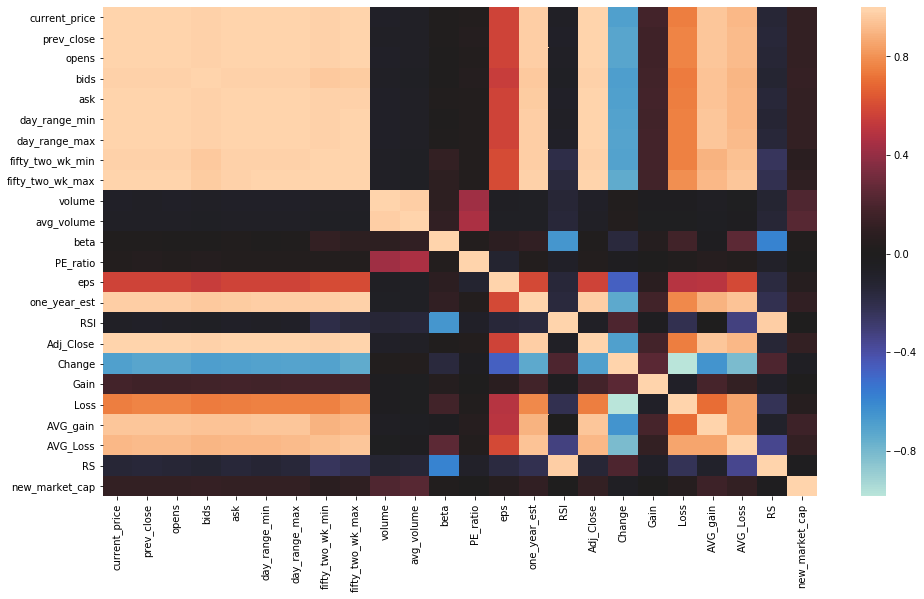

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,9))
sns.heatmap(X_res.corr(), center=0);

As we can see, several of our features are highly correlated.

## Feature engineering and selection with PCA

We will use PCA to reduce the number of our compenents, but first we must determine the best number of components that will explain the most variance in our features. This will help us decompose the dataset into essential featues to help with our predictions. 
<br><br>
While we will not know what features are selected, the critical components will keep the most important values in a lower dimensional state.

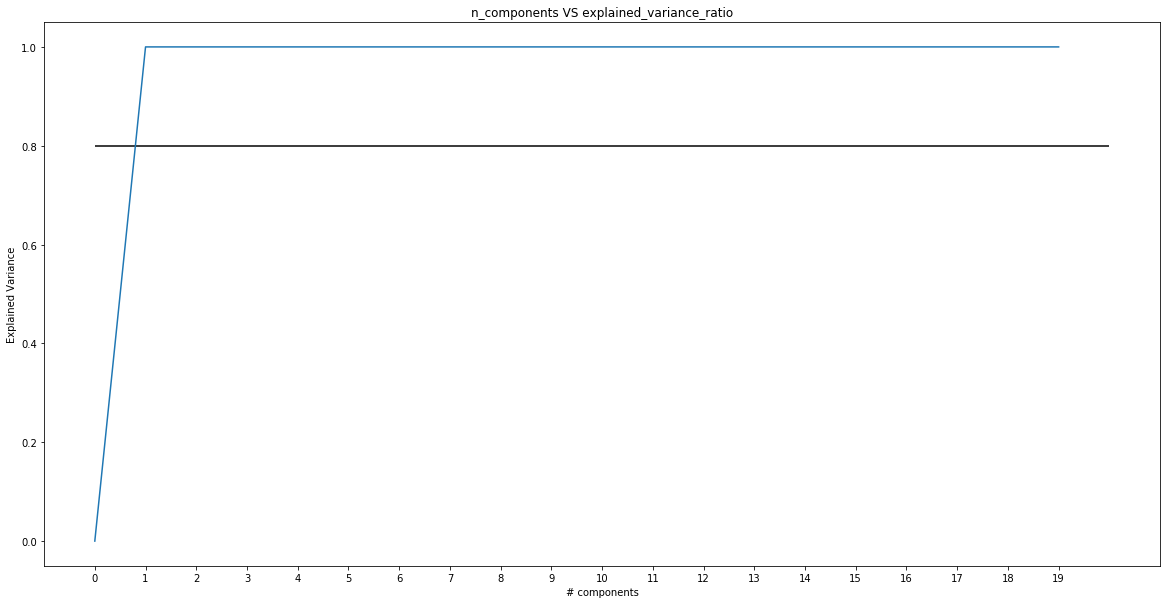

[0.0, 0.9999999450584657, 0.9999999994051728, 0.9999999999969298, 0.9999999999999704, 0.9999999999999992, 0.9999999999999992, 0.9999999999999992, 0.9999999999999992, 0.9999999999999992, 0.9999999999999992, 0.9999999999999992, 0.9999999999999992, 0.9999999999999992, 0.9999999999999988, 0.9999999999999988, 0.9999999999999988, 0.9999999999999983, 0.9999999999999988, 0.9999999999999988]


In [26]:
from sklearn.decomposition import PCA

res = []
for i in list(range(0,20)):
    test = X_res.copy()
    pca = PCA(n_components=i)
    pca.fit_transform(test)
    r = np.sum(pca.explained_variance_ratio_)
    res.append(r)
    
plt.figure(figsize=(20,10))
plt.plot(list(range(0,20)),res)
plt.title('n_components VS explained_variance_ratio')
plt.ylabel('Explained Variance')
plt.xlabel('# components')
plt.xticks(list(range(0,20)))
plt.hlines(.8,0,20)
plt.show();

print (res)

We decide that <b>5 components</b> will give the best explaination of the variance in our features.

In [27]:
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(X)
print(np.sum(pca.explained_variance_ratio_))

0.9999999999999998


Here we will plot our heat map to see if the principle components hold the high correlation as the standard features. 

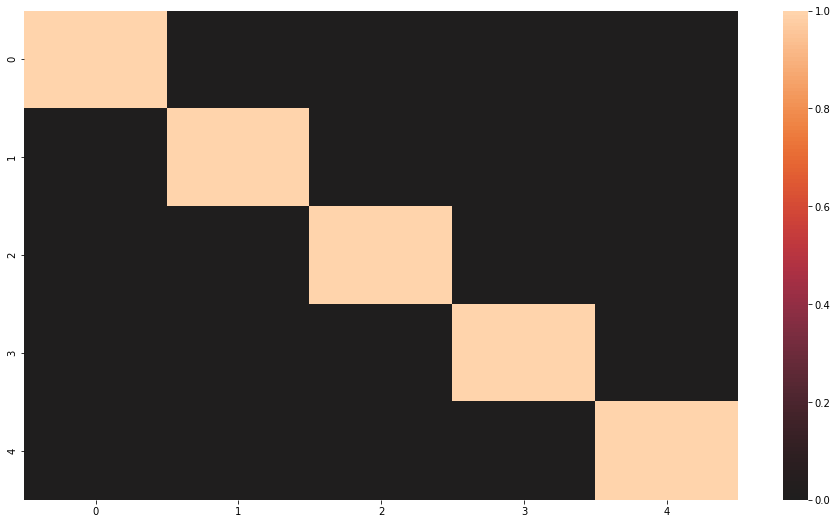

In [28]:
import seaborn as sns
plt.figure(figsize=(16,9))
sns.heatmap(pd.DataFrame(principalComponents).corr(), center=0);

## Performing a Train / Test / Split on the dataset 

Now it's time to do a train test split on our data! We will use a test size of 20% and a random_state=123 for replication. 

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=123)

### Scaling the Training dataset with StandardScaler()

We will use a <b>StandardScaler()</b> from sklearn to standardize features by removing the mean and scaling to unit variance. Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform, and in our case, we will use the <b>.fit_transform</b> method to do this all at once. 
<br><br>
We are standardizing our dataset to be normally distributed data, as many elements used in the objective function of a learning algorithm like the RBF kernel of Support Vector Machines, assume that all features are centered around 0 and have variance in the same order. If a feature has a variance that is orders of magnitude larger that others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.
<br><br>
We will only scale our training and test features, and not the target. This way we reduce information leak, and improve our model by providing data in the correct format. We can also build this into our piplines below, but this is an essetion part before doing any principle component analysis, or building a baseline model. 

In [30]:
from sklearn.preprocessing import StandardScaler
scalr = StandardScaler()
X_train_scaled = scalr.fit_transform(X_train)

# viewing the scaled data
pd.DataFrame(X_train_scaled, columns=X_train.columns).head()

,current_price,prev_close,opens,bids,ask,day_range_min,day_range_max,fifty_two_wk_min,fifty_two_wk_max,volume,avg_volume,beta,PE_ratio,eps,one_year_est,RSI,Adj_Close,Change,Gain,Loss,AVG_gain,AVG_Loss,RS,new_market_cap
0,-0.511240,-0.511690,-0.514204,-0.574651,-0.473031,-0.515665,-0.513397,-0.422939,-0.501430,-0.169255,0.020030,0.095235,-0.094314,-0.488660,-0.490724,-0.533892,-0.511241,0.340351,-0.189542,-0.388618,-0.526000,-0.401232,-0.677851,-0.044975
1,-0.435750,-0.438802,-0.432744,-0.423840,-0.429839,-0.430310,-0.439498,-0.481805,-0.493349,-0.321756,-0.338295,0.253935,-0.128302,-0.409160,-0.473136,1.440843,-0.435750,0.356691,-0.189542,-0.405497,-0.570247,-0.581380,1.787759,-0.044975
2,0.009900,0.005015,0.003480,-0.003984,0.106952,0.010486,0.011965,0.162195,0.125506,-0.398880,-0.340795,0.903810,0.937815,-0.138327,0.151186,-1.035704,0.009907,0.119640,-0.189542,-0.160622,-0.281979,0.123097,-0.859141,-0.044975
3,-0.040074,0.092200,0.071887,-0.012459,-0.051052,-0.039331,0.061262,0.137025,0.628883,0.182022,-0.059914,0.527580,0.126191,-0.375756,0.738166,-1.038112,-0.040068,-3.228799,-0.189542,3.298327,0.471877,1.465426,-0.860605,-0.044975
4,-0.118885,-0.124201,-0.111254,-0.093066,-0.132084,-0.107421,-0.123692,-0.317602,-0.219060,-0.050398,-0.097805,-1.486898,-0.155840,-0.114560,-0.235165,1.198587,-0.118880,0.211800,-0.189542,-0.255824,0.026518,-0.439629,1.115626,-0.044975


# Creating a baseline model

Now it's finally time to build our <b>baseline model</b>! Since we have a low to medium number of data points and many features, and we will build a baseline model using a Support Vector Machine.
<br><br>
We will also use Pipelines to help build our initial model.

In [31]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [32]:
# Construct some pipelines
pipe_svc = Pipeline([('pca', PCA(n_components=5, random_state=123)),
         ('clf', SVC(random_state=123))])

# Fit the pipelines
pipe_svc.fit(X_train_scaled, y_train)

X_test_scaled = scalr.transform(X_test)
print('Baseline SVM pipeline test accuracy:')
print(pipe_svc.score(X_test_scaled, y_test))

Baseline SVM pipeline test accuracy:
0.8914728682170543


Here we can see the confusion matrix showing us the total number of true vs predicted values. 

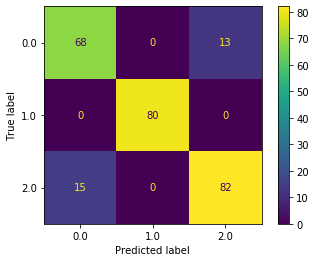

In [33]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
plot_confusion_matrix(pipe_svc, X_test_scaled, y_test);

## Creating Various Pipelines to Compare Model Performance

Now we will create various pipelines to compare models using the built in accuracy scores of <b><i>Support Vector Machine, KNN Classifier, AdaBoost Classifier, Voting Classifier, Stacking Classifiers, and MLPClassifier.</i></b>

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier, StackingClassifier


# Constructing some pipelines
pipe_svm = Pipeline([('pca', PCA(n_components=5)),
        ('clf', SVC(random_state=123))])

pipe_knc = Pipeline([('pca', PCA(n_components=5)),
        ('clf', KNeighborsClassifier())])

pipe_ada = Pipeline([('pca', PCA(n_components=5)),
        ('clf', AdaBoostClassifier(random_state=123))])
        
pipe_vote = Pipeline([('pca', PCA(n_components=5)),
        ('clf', VotingClassifier(estimators=[ ('svm', pipe_svm),('knc',pipe_knc),
                                             ('ada',pipe_ada)]))])

pipe_stack = Pipeline([('pca', PCA(n_components=5)),
        ('clf', StackingClassifier(estimators=[ ('svm', pipe_svm),('knc',pipe_knc),
                                               ('ada',pipe_ada)]))])

pipe_MLPC = Pipeline([('pca', PCA(n_components=5)),
        ('clf', MLPClassifier(random_state=123))])




# List of pipelines, List of pipeline names
pipelines = [pipe_svm, pipe_knc, pipe_ada, pipe_vote, pipe_stack, pipe_MLPC]
pipeline_names = ['Baseline SVM','KNClassifier','AdaBoost','Voting','Stacking', 'MLPClassifier']



# Loop to fit each of the three pipelines
for pipe in pipelines:
    print(pipe)
    pipe.fit(X_train_scaled, y_train)

# Compare accuracies
scores_df = pd.DataFrame()
scores = []
for index, val in enumerate(pipelines):
    s = val.score(X_test_scaled, y_test)
    scores.append(s)
    print('%s pipeline test accuracy: %.3f' % (pipeline_names[index], val.score(X_test_scaled, y_test)))



Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=123, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=5,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('clf',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=N

Here we will analyze the scores of all the different models we tried in our attempts.

In [35]:
scores_df['Model'] = pipeline_names
scores_df['Accuracy_Score'] = scores
scores_df.sort_values(by='Accuracy_Score',ascending=False)

,Model,Accuracy_Score
5,MLPClassifier,0.895349
0,Baseline SVM,0.891473
1,KNClassifier,0.883721
4,Stacking,0.883721
3,Voting,0.875969
2,AdaBoost,0.802326


As we can see, the <b>MLPClassifier</b> performed the best in comparision to other models and our initial baseline model. The MLPClassifier is a Multi-layer Perceptron classifier. This model optimizes the log-loss function using LBFGS or stochastic gradient descent, and in our example we used the default solver 'adam', which works pretty well on relatively large datasets, but for small datasets, it's recommended to use, 'lbfgs', as this function can converge faster and perform better.
<br>
<br>
<b>Multi-layer Perceptron (MLP)</b> is a supervised learning algorithm that learns a function by training on a dataset. Given a set of features and a target, it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. MLP also requires tuning a number of hyperparameters such as the number of hidden neurons, layers, and iterations.
<br>
<br>
Below we will perform a grid search cross-validation to see if we can improve our model(s) by tuning our hyperparameters.

## Pipeline with grid search, PCA, and SVM to improve our baseline model

We will now use another tool from. sklearn, "GridSearchCV". We will use the grid search to help us find the best hyperparameters for our final model, and ideally increase the accuracy of our classification model. 

In [36]:
from sklearn.model_selection import GridSearchCV

pipe_svm = Pipeline([('pca', PCA(n_components=5)),
        ('clf', SVC(random_state=123))])

# Set grid search params
param_grid_svm = [ 
  {'clf__C': [0, 0.1, 1],
   'clf__kernel': ['rbf', 'linear', 'poly', 'sigmoid'], 
   'clf__degree': [1,2,3],  
   'clf__gamma':['scale','auto'],  
   'clf__coef0':[0.0, 0.05 ,0.1]
  }
]


# Construct grid search
gs_svm = GridSearchCV(estimator=pipe_svm,
            param_grid=param_grid_svm,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)

# Fit using grid search
gs_svm.fit(X_train_scaled, y_train)



Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] clf__C=0, clf__coef0=0.0, clf__degree=1, clf__gamma=scale, clf__kernel=rbf 
[CV]  clf__C=0, clf__coef0=0.0, clf__degree=1, clf__gamma=scale, clf__kernel=rbf, total=   0.0s
[CV] clf__C=0, clf__coef0=0.0, clf__degree=1, clf__gamma=scale, clf__kernel=rbf 
[CV]  clf__C=0, clf__coef0=0.0, clf__degree=1, clf__gamma=scale, clf__kernel=rbf, total=   0.0s
[CV] clf__C=0, clf__coef0=0.0, clf__degree=1, clf__gamma=scale, clf__kernel=rbf 
[CV]  clf__C=0, clf__coef0=0.0, clf__degree=1, clf__gamma=scale, clf__kernel=rbf, total=   0.0s
[CV] clf__C=0, clf__coef0=0.0, clf__degree=1, clf__gamma=scale, clf__kernel=linear 
[CV]  clf__C=0, clf__coef0=0.0, clf__degree=1, clf__gamma=scale, clf__kernel=linear, total=   0.0s
[CV] clf__C=0, clf__coef0=0.0, clf__degree=1, clf__gamma=scale, clf__kernel=linear 
[CV]  clf__C=0, clf__coef0=0.0, clf__degree=1, clf__gamma=scale, clf__kernel=linear, total=   0.0s
[CV] clf__C=0, clf__coef0=0.0, clf__degr

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  clf__C=0, clf__coef0=0.0, clf__degree=3, clf__gamma=scale, clf__kernel=rbf, total=   0.0s
[CV] clf__C=0, clf__coef0=0.0, clf__degree=3, clf__gamma=scale, clf__kernel=rbf 
[CV]  clf__C=0, clf__coef0=0.0, clf__degree=3, clf__gamma=scale, clf__kernel=rbf, total=   0.0s
[CV] clf__C=0, clf__coef0=0.0, clf__degree=3, clf__gamma=scale, clf__kernel=rbf 
[CV]  clf__C=0, clf__coef0=0.0, clf__degree=3, clf__gamma=scale, clf__kernel=rbf, total=   0.0s
[CV] clf__C=0, clf__coef0=0.0, clf__degree=3, clf__gamma=scale, clf__kernel=linear 
[CV]  clf__C=0, clf__coef0=0.0, clf__degree=3, clf__gamma=scale, clf__kernel=linear, total=   0.0s
[CV] clf__C=0, clf__coef0=0.0, clf__degree=3, clf__gamma=scale, clf__kernel=linear 
[CV]  clf__C=0, clf__coef0=0.0, clf__degree=3, clf__gamma=scale, clf__kernel=linear, total=   0.0s
[CV] clf__C=0, clf__coef0=0.0, clf__degree=3, clf__gamma=scale, clf__kernel=linear 
[CV]  clf__C=0, clf__coef0=0.0, clf__degree=3, clf__gamma=scale, clf__kernel=linear, total=   0.0s
[

[CV]  clf__C=0, clf__coef0=0.05, clf__degree=1, clf__gamma=auto, clf__kernel=sigmoid, total=   0.0s
[CV] clf__C=0, clf__coef0=0.05, clf__degree=2, clf__gamma=scale, clf__kernel=rbf 
[CV]  clf__C=0, clf__coef0=0.05, clf__degree=2, clf__gamma=scale, clf__kernel=rbf, total=   0.0s
[CV] clf__C=0, clf__coef0=0.05, clf__degree=2, clf__gamma=scale, clf__kernel=rbf 
[CV]  clf__C=0, clf__coef0=0.05, clf__degree=2, clf__gamma=scale, clf__kernel=rbf, total=   0.0s
[CV] clf__C=0, clf__coef0=0.05, clf__degree=2, clf__gamma=scale, clf__kernel=rbf 
[CV]  clf__C=0, clf__coef0=0.05, clf__degree=2, clf__gamma=scale, clf__kernel=rbf, total=   0.0s
[CV] clf__C=0, clf__coef0=0.05, clf__degree=2, clf__gamma=scale, clf__kernel=linear 
[CV]  clf__C=0, clf__coef0=0.05, clf__degree=2, clf__gamma=scale, clf__kernel=linear, total=   0.0s
[CV] clf__C=0, clf__coef0=0.05, clf__degree=2, clf__gamma=scale, clf__kernel=linear 
[CV]  clf__C=0, clf__coef0=0.05, clf__degree=2, clf__gamma=scale, clf__kernel=linear, total= 

[CV]  clf__C=0, clf__coef0=0.1, clf__degree=1, clf__gamma=scale, clf__kernel=rbf, total=   0.0s
[CV] clf__C=0, clf__coef0=0.1, clf__degree=1, clf__gamma=scale, clf__kernel=rbf 
[CV]  clf__C=0, clf__coef0=0.1, clf__degree=1, clf__gamma=scale, clf__kernel=rbf, total=   0.0s
[CV] clf__C=0, clf__coef0=0.1, clf__degree=1, clf__gamma=scale, clf__kernel=linear 
[CV]  clf__C=0, clf__coef0=0.1, clf__degree=1, clf__gamma=scale, clf__kernel=linear, total=   0.0s
[CV] clf__C=0, clf__coef0=0.1, clf__degree=1, clf__gamma=scale, clf__kernel=linear 
[CV]  clf__C=0, clf__coef0=0.1, clf__degree=1, clf__gamma=scale, clf__kernel=linear, total=   0.0s
[CV] clf__C=0, clf__coef0=0.1, clf__degree=1, clf__gamma=scale, clf__kernel=linear 
[CV]  clf__C=0, clf__coef0=0.1, clf__degree=1, clf__gamma=scale, clf__kernel=linear, total=   0.0s
[CV] clf__C=0, clf__coef0=0.1, clf__degree=1, clf__gamma=scale, clf__kernel=poly 
[CV]  clf__C=0, clf__coef0=0.1, clf__degree=1, clf__gamma=scale, clf__kernel=poly, total=   0.0s

[CV]  clf__C=0, clf__coef0=0.1, clf__degree=3, clf__gamma=scale, clf__kernel=linear, total=   0.0s
[CV] clf__C=0, clf__coef0=0.1, clf__degree=3, clf__gamma=scale, clf__kernel=linear 
[CV]  clf__C=0, clf__coef0=0.1, clf__degree=3, clf__gamma=scale, clf__kernel=linear, total=   0.0s
[CV] clf__C=0, clf__coef0=0.1, clf__degree=3, clf__gamma=scale, clf__kernel=linear 
[CV]  clf__C=0, clf__coef0=0.1, clf__degree=3, clf__gamma=scale, clf__kernel=linear, total=   0.0s
[CV] clf__C=0, clf__coef0=0.1, clf__degree=3, clf__gamma=scale, clf__kernel=poly 
[CV]  clf__C=0, clf__coef0=0.1, clf__degree=3, clf__gamma=scale, clf__kernel=poly, total=   0.0s
[CV] clf__C=0, clf__coef0=0.1, clf__degree=3, clf__gamma=scale, clf__kernel=poly 
[CV]  clf__C=0, clf__coef0=0.1, clf__degree=3, clf__gamma=scale, clf__kernel=poly, total=   0.0s
[CV] clf__C=0, clf__coef0=0.1, clf__degree=3, clf__gamma=scale, clf__kernel=poly 
[CV]  clf__C=0, clf__coef0=0.1, clf__degree=3, clf__gamma=scale, clf__kernel=poly, total=   0.0

[CV]  clf__C=0.1, clf__coef0=0.0, clf__degree=2, clf__gamma=scale, clf__kernel=rbf, total=   0.0s
[CV] clf__C=0.1, clf__coef0=0.0, clf__degree=2, clf__gamma=scale, clf__kernel=linear 
[CV]  clf__C=0.1, clf__coef0=0.0, clf__degree=2, clf__gamma=scale, clf__kernel=linear, total=   0.0s
[CV] clf__C=0.1, clf__coef0=0.0, clf__degree=2, clf__gamma=scale, clf__kernel=linear 
[CV]  clf__C=0.1, clf__coef0=0.0, clf__degree=2, clf__gamma=scale, clf__kernel=linear, total=   0.0s
[CV] clf__C=0.1, clf__coef0=0.0, clf__degree=2, clf__gamma=scale, clf__kernel=linear 
[CV]  clf__C=0.1, clf__coef0=0.0, clf__degree=2, clf__gamma=scale, clf__kernel=linear, total=   0.0s
[CV] clf__C=0.1, clf__coef0=0.0, clf__degree=2, clf__gamma=scale, clf__kernel=poly 
[CV]  clf__C=0.1, clf__coef0=0.0, clf__degree=2, clf__gamma=scale, clf__kernel=poly, total=   0.0s
[CV] clf__C=0.1, clf__coef0=0.0, clf__degree=2, clf__gamma=scale, clf__kernel=poly 
[CV]  clf__C=0.1, clf__coef0=0.0, clf__degree=2, clf__gamma=scale, clf__ke

[CV]  clf__C=0.1, clf__coef0=0.05, clf__degree=1, clf__gamma=scale, clf__kernel=linear, total=   0.0s
[CV] clf__C=0.1, clf__coef0=0.05, clf__degree=1, clf__gamma=scale, clf__kernel=linear 
[CV]  clf__C=0.1, clf__coef0=0.05, clf__degree=1, clf__gamma=scale, clf__kernel=linear, total=   0.0s
[CV] clf__C=0.1, clf__coef0=0.05, clf__degree=1, clf__gamma=scale, clf__kernel=linear 
[CV]  clf__C=0.1, clf__coef0=0.05, clf__degree=1, clf__gamma=scale, clf__kernel=linear, total=   0.0s
[CV] clf__C=0.1, clf__coef0=0.05, clf__degree=1, clf__gamma=scale, clf__kernel=poly 
[CV]  clf__C=0.1, clf__coef0=0.05, clf__degree=1, clf__gamma=scale, clf__kernel=poly, total=   0.0s
[CV] clf__C=0.1, clf__coef0=0.05, clf__degree=1, clf__gamma=scale, clf__kernel=poly 
[CV]  clf__C=0.1, clf__coef0=0.05, clf__degree=1, clf__gamma=scale, clf__kernel=poly, total=   0.0s
[CV] clf__C=0.1, clf__coef0=0.05, clf__degree=1, clf__gamma=scale, clf__kernel=poly 
[CV]  clf__C=0.1, clf__coef0=0.05, clf__degree=1, clf__gamma=scal

[CV]  clf__C=0.1, clf__coef0=0.05, clf__degree=3, clf__gamma=scale, clf__kernel=poly, total=   0.0s
[CV] clf__C=0.1, clf__coef0=0.05, clf__degree=3, clf__gamma=scale, clf__kernel=poly 
[CV]  clf__C=0.1, clf__coef0=0.05, clf__degree=3, clf__gamma=scale, clf__kernel=poly, total=   0.0s
[CV] clf__C=0.1, clf__coef0=0.05, clf__degree=3, clf__gamma=scale, clf__kernel=sigmoid 
[CV]  clf__C=0.1, clf__coef0=0.05, clf__degree=3, clf__gamma=scale, clf__kernel=sigmoid, total=   0.0s
[CV] clf__C=0.1, clf__coef0=0.05, clf__degree=3, clf__gamma=scale, clf__kernel=sigmoid 
[CV]  clf__C=0.1, clf__coef0=0.05, clf__degree=3, clf__gamma=scale, clf__kernel=sigmoid, total=   0.0s
[CV] clf__C=0.1, clf__coef0=0.05, clf__degree=3, clf__gamma=scale, clf__kernel=sigmoid 
[CV]  clf__C=0.1, clf__coef0=0.05, clf__degree=3, clf__gamma=scale, clf__kernel=sigmoid, total=   0.0s
[CV] clf__C=0.1, clf__coef0=0.05, clf__degree=3, clf__gamma=auto, clf__kernel=rbf 
[CV]  clf__C=0.1, clf__coef0=0.05, clf__degree=3, clf__gamm

[CV]  clf__C=0.1, clf__coef0=0.1, clf__degree=2, clf__gamma=scale, clf__kernel=linear, total=   0.0s
[CV] clf__C=0.1, clf__coef0=0.1, clf__degree=2, clf__gamma=scale, clf__kernel=linear 
[CV]  clf__C=0.1, clf__coef0=0.1, clf__degree=2, clf__gamma=scale, clf__kernel=linear, total=   0.0s
[CV] clf__C=0.1, clf__coef0=0.1, clf__degree=2, clf__gamma=scale, clf__kernel=poly 
[CV]  clf__C=0.1, clf__coef0=0.1, clf__degree=2, clf__gamma=scale, clf__kernel=poly, total=   0.0s
[CV] clf__C=0.1, clf__coef0=0.1, clf__degree=2, clf__gamma=scale, clf__kernel=poly 
[CV]  clf__C=0.1, clf__coef0=0.1, clf__degree=2, clf__gamma=scale, clf__kernel=poly, total=   0.0s
[CV] clf__C=0.1, clf__coef0=0.1, clf__degree=2, clf__gamma=scale, clf__kernel=poly 
[CV]  clf__C=0.1, clf__coef0=0.1, clf__degree=2, clf__gamma=scale, clf__kernel=poly, total=   0.0s
[CV] clf__C=0.1, clf__coef0=0.1, clf__degree=2, clf__gamma=scale, clf__kernel=sigmoid 
[CV]  clf__C=0.1, clf__coef0=0.1, clf__degree=2, clf__gamma=scale, clf__kern

[CV]  clf__C=1, clf__coef0=0.0, clf__degree=1, clf__gamma=scale, clf__kernel=linear, total=   0.0s
[CV] clf__C=1, clf__coef0=0.0, clf__degree=1, clf__gamma=scale, clf__kernel=linear 
[CV]  clf__C=1, clf__coef0=0.0, clf__degree=1, clf__gamma=scale, clf__kernel=linear, total=   0.0s
[CV] clf__C=1, clf__coef0=0.0, clf__degree=1, clf__gamma=scale, clf__kernel=poly 
[CV]  clf__C=1, clf__coef0=0.0, clf__degree=1, clf__gamma=scale, clf__kernel=poly, total=   0.0s
[CV] clf__C=1, clf__coef0=0.0, clf__degree=1, clf__gamma=scale, clf__kernel=poly 
[CV]  clf__C=1, clf__coef0=0.0, clf__degree=1, clf__gamma=scale, clf__kernel=poly, total=   0.0s
[CV] clf__C=1, clf__coef0=0.0, clf__degree=1, clf__gamma=scale, clf__kernel=poly 
[CV]  clf__C=1, clf__coef0=0.0, clf__degree=1, clf__gamma=scale, clf__kernel=poly, total=   0.0s
[CV] clf__C=1, clf__coef0=0.0, clf__degree=1, clf__gamma=scale, clf__kernel=sigmoid 
[CV]  clf__C=1, clf__coef0=0.0, clf__degree=1, clf__gamma=scale, clf__kernel=sigmoid, total=   0

[CV]  clf__C=1, clf__coef0=0.0, clf__degree=3, clf__gamma=scale, clf__kernel=linear, total=   0.0s
[CV] clf__C=1, clf__coef0=0.0, clf__degree=3, clf__gamma=scale, clf__kernel=linear 
[CV]  clf__C=1, clf__coef0=0.0, clf__degree=3, clf__gamma=scale, clf__kernel=linear, total=   0.0s
[CV] clf__C=1, clf__coef0=0.0, clf__degree=3, clf__gamma=scale, clf__kernel=linear 
[CV]  clf__C=1, clf__coef0=0.0, clf__degree=3, clf__gamma=scale, clf__kernel=linear, total=   0.0s
[CV] clf__C=1, clf__coef0=0.0, clf__degree=3, clf__gamma=scale, clf__kernel=poly 
[CV]  clf__C=1, clf__coef0=0.0, clf__degree=3, clf__gamma=scale, clf__kernel=poly, total=   0.0s
[CV] clf__C=1, clf__coef0=0.0, clf__degree=3, clf__gamma=scale, clf__kernel=poly 
[CV]  clf__C=1, clf__coef0=0.0, clf__degree=3, clf__gamma=scale, clf__kernel=poly, total=   0.0s
[CV] clf__C=1, clf__coef0=0.0, clf__degree=3, clf__gamma=scale, clf__kernel=poly 
[CV]  clf__C=1, clf__coef0=0.0, clf__degree=3, clf__gamma=scale, clf__kernel=poly, total=   0.0

[CV]  clf__C=1, clf__coef0=0.05, clf__degree=2, clf__gamma=scale, clf__kernel=poly, total=   0.0s
[CV] clf__C=1, clf__coef0=0.05, clf__degree=2, clf__gamma=scale, clf__kernel=poly 
[CV]  clf__C=1, clf__coef0=0.05, clf__degree=2, clf__gamma=scale, clf__kernel=poly, total=   0.0s
[CV] clf__C=1, clf__coef0=0.05, clf__degree=2, clf__gamma=scale, clf__kernel=sigmoid 
[CV]  clf__C=1, clf__coef0=0.05, clf__degree=2, clf__gamma=scale, clf__kernel=sigmoid, total=   0.0s
[CV] clf__C=1, clf__coef0=0.05, clf__degree=2, clf__gamma=scale, clf__kernel=sigmoid 
[CV]  clf__C=1, clf__coef0=0.05, clf__degree=2, clf__gamma=scale, clf__kernel=sigmoid, total=   0.0s
[CV] clf__C=1, clf__coef0=0.05, clf__degree=2, clf__gamma=scale, clf__kernel=sigmoid 
[CV]  clf__C=1, clf__coef0=0.05, clf__degree=2, clf__gamma=scale, clf__kernel=sigmoid, total=   0.0s
[CV] clf__C=1, clf__coef0=0.05, clf__degree=2, clf__gamma=auto, clf__kernel=rbf 
[CV]  clf__C=1, clf__coef0=0.05, clf__degree=2, clf__gamma=auto, clf__kernel=rb

[CV]  clf__C=1, clf__coef0=0.1, clf__degree=1, clf__gamma=auto, clf__kernel=linear, total=   0.0s
[CV] clf__C=1, clf__coef0=0.1, clf__degree=1, clf__gamma=auto, clf__kernel=linear 
[CV]  clf__C=1, clf__coef0=0.1, clf__degree=1, clf__gamma=auto, clf__kernel=linear, total=   0.0s
[CV] clf__C=1, clf__coef0=0.1, clf__degree=1, clf__gamma=auto, clf__kernel=poly 
[CV]  clf__C=1, clf__coef0=0.1, clf__degree=1, clf__gamma=auto, clf__kernel=poly, total=   0.0s
[CV] clf__C=1, clf__coef0=0.1, clf__degree=1, clf__gamma=auto, clf__kernel=poly 
[CV]  clf__C=1, clf__coef0=0.1, clf__degree=1, clf__gamma=auto, clf__kernel=poly, total=   0.0s
[CV] clf__C=1, clf__coef0=0.1, clf__degree=1, clf__gamma=auto, clf__kernel=poly 
[CV]  clf__C=1, clf__coef0=0.1, clf__degree=1, clf__gamma=auto, clf__kernel=poly, total=   0.0s
[CV] clf__C=1, clf__coef0=0.1, clf__degree=1, clf__gamma=auto, clf__kernel=sigmoid 
[CV]  clf__C=1, clf__coef0=0.1, clf__degree=1, clf__gamma=auto, clf__kernel=sigmoid, total=   0.0s
[CV] cl

[CV]  clf__C=1, clf__coef0=0.1, clf__degree=3, clf__gamma=auto, clf__kernel=linear, total=   0.0s
[CV] clf__C=1, clf__coef0=0.1, clf__degree=3, clf__gamma=auto, clf__kernel=linear 
[CV]  clf__C=1, clf__coef0=0.1, clf__degree=3, clf__gamma=auto, clf__kernel=linear, total=   0.0s
[CV] clf__C=1, clf__coef0=0.1, clf__degree=3, clf__gamma=auto, clf__kernel=linear 
[CV]  clf__C=1, clf__coef0=0.1, clf__degree=3, clf__gamma=auto, clf__kernel=linear, total=   0.0s
[CV] clf__C=1, clf__coef0=0.1, clf__degree=3, clf__gamma=auto, clf__kernel=poly 
[CV]  clf__C=1, clf__coef0=0.1, clf__degree=3, clf__gamma=auto, clf__kernel=poly, total=   0.1s
[CV] clf__C=1, clf__coef0=0.1, clf__degree=3, clf__gamma=auto, clf__kernel=poly 
[CV]  clf__C=1, clf__coef0=0.1, clf__degree=3, clf__gamma=auto, clf__kernel=poly, total=   0.1s
[CV] clf__C=1, clf__coef0=0.1, clf__degree=3, clf__gamma=auto, clf__kernel=poly 
[CV]  clf__C=1, clf__coef0=0.1, clf__degree=3, clf__gamma=auto, clf__kernel=poly, total=   0.0s
[CV] clf_

[Parallel(n_jobs=1)]: Done 648 out of 648 | elapsed:   10.7s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=5, random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('clf',
                                        SVC(C=1.0, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probab...dom_state=123,
                                            shrink

Althought this exhaustive fitting of hyperparameters can utilize more resources, it can in some cases improve the accuracy of your model. In our case, our accuracy was increased. We can also view the best paramaters selected from the exhaustive cross-validation search.

In [37]:
# Best accuracy
print('Best accuracy: %.3f' % gs_svm.best_score_)

# Best params
print('\nBest params:\n', gs_svm.best_params_)

# gs_svm.cv_results_

gs_scores_df = pd.DataFrame()
gs_scores_df['Model'] = ['**GS** SVM']
gs_scores_df['Accuracy_Score'] = [gs_svm.best_score_]
gs_scores_df

Best accuracy: 0.890

Best params:
 {'clf__C': 1, 'clf__coef0': 0.05, 'clf__degree': 2, 'clf__gamma': 'scale', 'clf__kernel': 'poly'}


,Model,Accuracy_Score
0,**GS** SVM,0.890185


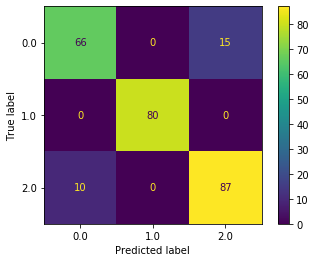

In [38]:
plot_confusion_matrix(gs_svm, X_test_scaled, y_test);

When compared to the other scores, we see the grid search has helped imporve this model.

In [39]:
pd.concat([scores_df,gs_scores_df]).sort_values(by='Accuracy_Score',ascending=False)

,Model,Accuracy_Score
5,MLPClassifier,0.895349
0,Baseline SVM,0.891473
0,**GS** SVM,0.890185
1,KNClassifier,0.883721
4,Stacking,0.883721
3,Voting,0.875969
2,AdaBoost,0.802326


## Pipeline with grid search, PCA, and MLPClassifier to improve our <i>pipe_MLPC</i> model

In [40]:
pipe_MLPC.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'pca', 'clf', 'pca__copy', 'pca__iterated_power', 'pca__n_components', 'pca__random_state', 'pca__svd_solver', 'pca__tol', 'pca__whiten', 'clf__activation', 'clf__alpha', 'clf__batch_size', 'clf__beta_1', 'clf__beta_2', 'clf__early_stopping', 'clf__epsilon', 'clf__hidden_layer_sizes', 'clf__learning_rate', 'clf__learning_rate_init', 'clf__max_fun', 'clf__max_iter', 'clf__momentum', 'clf__n_iter_no_change', 'clf__nesterovs_momentum', 'clf__power_t', 'clf__random_state', 'clf__shuffle', 'clf__solver', 'clf__tol', 'clf__validation_fraction', 'clf__verbose', 'clf__warm_start'])

In [41]:
from sklearn.model_selection import GridSearchCV

pipe_MLPC = Pipeline([('pca', PCA(n_components=5)),
        ('clf', MLPClassifier(random_state=123))])

# Set grid search params
param_grid_MLPC = [ 
  {'clf__hidden_layer_sizes': [(100,),(200,),(300,)],
   'clf__activation': ['identity', 'logistic', 'tanh', 'relu'],
   'clf__solver': ['lbfgs', 'sgd', 'adam'],
   'clf__alpha': [0.0001, 0.0002, 0.0003],
   'clf__learning_rate': ['constant', 'invscaling', 'adaptive']
  }
]


# Construct grid search
gs_MLPC = GridSearchCV(estimator=pipe_MLPC,
            param_grid=param_grid_MLPC,
            scoring='accuracy',
            cv=3, verbose=2, return_train_score = True)

# Fit using grid search
gs_MLPC.fit(X_train_scaled, y_train)



Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV] clf__activation=identity, clf__alpha=0.0001, clf__hidden_layer_sizes=(100,), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=identity, clf__alpha=0.0001, clf__hidden_layer_sizes=(100,), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=identity, clf__alpha=0.0001, clf__hidden_layer_sizes=(100,), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=identity, clf__alpha=0.0001, clf__hidden_layer_sizes=(100,), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.0s
[CV] clf__activation=identity, clf__alpha=0.0001, clf__hidden_layer_sizes=(100,), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=identity, clf__alpha=0.0001, clf__hidden_layer_sizes=(100,), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.0s
[CV] clf__activation=identity, clf__alpha=0.0001, clf__hidden_layer_sizes=(100,), clf__learning_rate=constant, c

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  clf__activation=identity, clf__alpha=0.0001, clf__hidden_layer_sizes=(100,), clf__learning_rate=constant, clf__solver=sgd, total=   0.3s
[CV] clf__activation=identity, clf__alpha=0.0001, clf__hidden_layer_sizes=(100,), clf__learning_rate=constant, clf__solver=sgd 
[CV]  clf__activation=identity, clf__alpha=0.0001, clf__hidden_layer_sizes=(100,), clf__learning_rate=constant, clf__solver=sgd, total=   0.3s
[CV] clf__activation=identity, clf__alpha=0.0001, clf__hidden_layer_sizes=(100,), clf__learning_rate=constant, clf__solver=sgd 
[CV]  clf__activation=identity, clf__alpha=0.0001, clf__hidden_layer_sizes=(100,), clf__learning_rate=constant, clf__solver=sgd, total=   0.3s
[CV] clf__activation=identity, clf__alpha=0.0001, clf__hidden_layer_sizes=(100,), clf__learning_rate=constant, clf__solver=adam 
[CV]  clf__activation=identity, clf__alpha=0.0001, clf__hidden_layer_sizes=(100,), clf__learning_rate=constant, clf__solver=adam, total=   0.4s
[CV] clf__activation=identity, clf__alpha=

[CV]  clf__activation=identity, clf__alpha=0.0001, clf__hidden_layer_sizes=(200,), clf__learning_rate=constant, clf__solver=adam, total=   0.3s
[CV] clf__activation=identity, clf__alpha=0.0001, clf__hidden_layer_sizes=(200,), clf__learning_rate=constant, clf__solver=adam 
[CV]  clf__activation=identity, clf__alpha=0.0001, clf__hidden_layer_sizes=(200,), clf__learning_rate=constant, clf__solver=adam, total=   0.3s
[CV] clf__activation=identity, clf__alpha=0.0001, clf__hidden_layer_sizes=(200,), clf__learning_rate=constant, clf__solver=adam 
[CV]  clf__activation=identity, clf__alpha=0.0001, clf__hidden_layer_sizes=(200,), clf__learning_rate=constant, clf__solver=adam, total=   0.3s
[CV] clf__activation=identity, clf__alpha=0.0001, clf__hidden_layer_sizes=(200,), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=identity, clf__alpha=0.0001, clf__hidden_layer_sizes=(200,), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=identity, 

[CV]  clf__activation=identity, clf__alpha=0.0001, clf__hidden_layer_sizes=(300,), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=identity, clf__alpha=0.0001, clf__hidden_layer_sizes=(300,), clf__learning_rate=invscaling, clf__solver=sgd 
[CV]  clf__activation=identity, clf__alpha=0.0001, clf__hidden_layer_sizes=(300,), clf__learning_rate=invscaling, clf__solver=sgd, total=   0.4s
[CV] clf__activation=identity, clf__alpha=0.0001, clf__hidden_layer_sizes=(300,), clf__learning_rate=invscaling, clf__solver=sgd 
[CV]  clf__activation=identity, clf__alpha=0.0001, clf__hidden_layer_sizes=(300,), clf__learning_rate=invscaling, clf__solver=sgd, total=   0.4s
[CV] clf__activation=identity, clf__alpha=0.0001, clf__hidden_layer_sizes=(300,), clf__learning_rate=invscaling, clf__solver=sgd 
[CV]  clf__activation=identity, clf__alpha=0.0001, clf__hidden_layer_sizes=(300,), clf__learning_rate=invscaling, clf__solver=sgd, total=   0.4s
[CV] clf__activation=identit

[CV]  clf__activation=identity, clf__alpha=0.0002, clf__hidden_layer_sizes=(100,), clf__learning_rate=invscaling, clf__solver=sgd, total=   0.3s
[CV] clf__activation=identity, clf__alpha=0.0002, clf__hidden_layer_sizes=(100,), clf__learning_rate=invscaling, clf__solver=adam 
[CV]  clf__activation=identity, clf__alpha=0.0002, clf__hidden_layer_sizes=(100,), clf__learning_rate=invscaling, clf__solver=adam, total=   0.4s
[CV] clf__activation=identity, clf__alpha=0.0002, clf__hidden_layer_sizes=(100,), clf__learning_rate=invscaling, clf__solver=adam 
[CV]  clf__activation=identity, clf__alpha=0.0002, clf__hidden_layer_sizes=(100,), clf__learning_rate=invscaling, clf__solver=adam, total=   0.3s
[CV] clf__activation=identity, clf__alpha=0.0002, clf__hidden_layer_sizes=(100,), clf__learning_rate=invscaling, clf__solver=adam 
[CV]  clf__activation=identity, clf__alpha=0.0002, clf__hidden_layer_sizes=(100,), clf__learning_rate=invscaling, clf__solver=adam, total=   0.3s
[CV] clf__activation=ide

[CV]  clf__activation=identity, clf__alpha=0.0002, clf__hidden_layer_sizes=(200,), clf__learning_rate=invscaling, clf__solver=adam, total=   0.3s
[CV] clf__activation=identity, clf__alpha=0.0002, clf__hidden_layer_sizes=(200,), clf__learning_rate=adaptive, clf__solver=lbfgs 
[CV]  clf__activation=identity, clf__alpha=0.0002, clf__hidden_layer_sizes=(200,), clf__learning_rate=adaptive, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=identity, clf__alpha=0.0002, clf__hidden_layer_sizes=(200,), clf__learning_rate=adaptive, clf__solver=lbfgs 
[CV]  clf__activation=identity, clf__alpha=0.0002, clf__hidden_layer_sizes=(200,), clf__learning_rate=adaptive, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=identity, clf__alpha=0.0002, clf__hidden_layer_sizes=(200,), clf__learning_rate=adaptive, clf__solver=lbfgs 
[CV]  clf__activation=identity, clf__alpha=0.0002, clf__hidden_layer_sizes=(200,), clf__learning_rate=adaptive, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=identity

[CV]  clf__activation=identity, clf__alpha=0.0002, clf__hidden_layer_sizes=(300,), clf__learning_rate=adaptive, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=identity, clf__alpha=0.0002, clf__hidden_layer_sizes=(300,), clf__learning_rate=adaptive, clf__solver=sgd 
[CV]  clf__activation=identity, clf__alpha=0.0002, clf__hidden_layer_sizes=(300,), clf__learning_rate=adaptive, clf__solver=sgd, total=   0.4s
[CV] clf__activation=identity, clf__alpha=0.0002, clf__hidden_layer_sizes=(300,), clf__learning_rate=adaptive, clf__solver=sgd 
[CV]  clf__activation=identity, clf__alpha=0.0002, clf__hidden_layer_sizes=(300,), clf__learning_rate=adaptive, clf__solver=sgd, total=   0.4s
[CV] clf__activation=identity, clf__alpha=0.0002, clf__hidden_layer_sizes=(300,), clf__learning_rate=adaptive, clf__solver=sgd 
[CV]  clf__activation=identity, clf__alpha=0.0002, clf__hidden_layer_sizes=(300,), clf__learning_rate=adaptive, clf__solver=sgd, total=   0.4s
[CV] clf__activation=identity, clf__alpha=

[CV]  clf__activation=identity, clf__alpha=0.0003, clf__hidden_layer_sizes=(100,), clf__learning_rate=adaptive, clf__solver=sgd, total=   0.3s
[CV] clf__activation=identity, clf__alpha=0.0003, clf__hidden_layer_sizes=(100,), clf__learning_rate=adaptive, clf__solver=adam 
[CV]  clf__activation=identity, clf__alpha=0.0003, clf__hidden_layer_sizes=(100,), clf__learning_rate=adaptive, clf__solver=adam, total=   0.4s
[CV] clf__activation=identity, clf__alpha=0.0003, clf__hidden_layer_sizes=(100,), clf__learning_rate=adaptive, clf__solver=adam 
[CV]  clf__activation=identity, clf__alpha=0.0003, clf__hidden_layer_sizes=(100,), clf__learning_rate=adaptive, clf__solver=adam, total=   0.4s
[CV] clf__activation=identity, clf__alpha=0.0003, clf__hidden_layer_sizes=(100,), clf__learning_rate=adaptive, clf__solver=adam 
[CV]  clf__activation=identity, clf__alpha=0.0003, clf__hidden_layer_sizes=(100,), clf__learning_rate=adaptive, clf__solver=adam, total=   0.3s
[CV] clf__activation=identity, clf__al

[CV]  clf__activation=identity, clf__alpha=0.0003, clf__hidden_layer_sizes=(200,), clf__learning_rate=adaptive, clf__solver=adam, total=   0.4s
[CV] clf__activation=identity, clf__alpha=0.0003, clf__hidden_layer_sizes=(300,), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=identity, clf__alpha=0.0003, clf__hidden_layer_sizes=(300,), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=identity, clf__alpha=0.0003, clf__hidden_layer_sizes=(300,), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=identity, clf__alpha=0.0003, clf__hidden_layer_sizes=(300,), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=identity, clf__alpha=0.0003, clf__hidden_layer_sizes=(300,), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=identity, clf__alpha=0.0003, clf__hidden_layer_sizes=(300,), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.1s
[CV] clf__activation=identity, 

[CV]  clf__activation=logistic, clf__alpha=0.0001, clf__hidden_layer_sizes=(100,), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.3s
[CV] clf__activation=logistic, clf__alpha=0.0001, clf__hidden_layer_sizes=(100,), clf__learning_rate=constant, clf__solver=sgd 
[CV]  clf__activation=logistic, clf__alpha=0.0001, clf__hidden_layer_sizes=(100,), clf__learning_rate=constant, clf__solver=sgd, total=   0.5s
[CV] clf__activation=logistic, clf__alpha=0.0001, clf__hidden_layer_sizes=(100,), clf__learning_rate=constant, clf__solver=sgd 
[CV]  clf__activation=logistic, clf__alpha=0.0001, clf__hidden_layer_sizes=(100,), clf__learning_rate=constant, clf__solver=sgd, total=   0.5s
[CV] clf__activation=logistic, clf__alpha=0.0001, clf__hidden_layer_sizes=(100,), clf__learning_rate=constant, clf__solver=sgd 
[CV]  clf__activation=logistic, clf__alpha=0.0001, clf__hidden_layer_sizes=(100,), clf__learning_rate=constant, clf__solver=sgd, total=   0.5s
[CV] clf__activation=logistic, clf__alpha=

[CV]  clf__activation=logistic, clf__alpha=0.0001, clf__hidden_layer_sizes=(200,), clf__learning_rate=constant, clf__solver=sgd, total=   0.7s
[CV] clf__activation=logistic, clf__alpha=0.0001, clf__hidden_layer_sizes=(200,), clf__learning_rate=constant, clf__solver=adam 
[CV]  clf__activation=logistic, clf__alpha=0.0001, clf__hidden_layer_sizes=(200,), clf__learning_rate=constant, clf__solver=adam, total=   0.7s
[CV] clf__activation=logistic, clf__alpha=0.0001, clf__hidden_layer_sizes=(200,), clf__learning_rate=constant, clf__solver=adam 
[CV]  clf__activation=logistic, clf__alpha=0.0001, clf__hidden_layer_sizes=(200,), clf__learning_rate=constant, clf__solver=adam, total=   0.8s
[CV] clf__activation=logistic, clf__alpha=0.0001, clf__hidden_layer_sizes=(200,), clf__learning_rate=constant, clf__solver=adam 
[CV]  clf__activation=logistic, clf__alpha=0.0001, clf__hidden_layer_sizes=(200,), clf__learning_rate=constant, clf__solver=adam, total=   0.8s
[CV] clf__activation=logistic, clf__al

[CV]  clf__activation=logistic, clf__alpha=0.0001, clf__hidden_layer_sizes=(300,), clf__learning_rate=constant, clf__solver=adam, total=   1.0s
[CV] clf__activation=logistic, clf__alpha=0.0001, clf__hidden_layer_sizes=(300,), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=logistic, clf__alpha=0.0001, clf__hidden_layer_sizes=(300,), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.8s
[CV] clf__activation=logistic, clf__alpha=0.0001, clf__hidden_layer_sizes=(300,), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=logistic, clf__alpha=0.0001, clf__hidden_layer_sizes=(300,), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.9s
[CV] clf__activation=logistic, clf__alpha=0.0001, clf__hidden_layer_sizes=(300,), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=logistic, clf__alpha=0.0001, clf__hidden_layer_sizes=(300,), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.8s
[CV] clf__activatio

[CV]  clf__activation=logistic, clf__alpha=0.0002, clf__hidden_layer_sizes=(100,), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.3s
[CV] clf__activation=logistic, clf__alpha=0.0002, clf__hidden_layer_sizes=(100,), clf__learning_rate=invscaling, clf__solver=sgd 
[CV]  clf__activation=logistic, clf__alpha=0.0002, clf__hidden_layer_sizes=(100,), clf__learning_rate=invscaling, clf__solver=sgd, total=   0.1s
[CV] clf__activation=logistic, clf__alpha=0.0002, clf__hidden_layer_sizes=(100,), clf__learning_rate=invscaling, clf__solver=sgd 
[CV]  clf__activation=logistic, clf__alpha=0.0002, clf__hidden_layer_sizes=(100,), clf__learning_rate=invscaling, clf__solver=sgd, total=   0.1s
[CV] clf__activation=logistic, clf__alpha=0.0002, clf__hidden_layer_sizes=(100,), clf__learning_rate=invscaling, clf__solver=sgd 
[CV]  clf__activation=logistic, clf__alpha=0.0002, clf__hidden_layer_sizes=(100,), clf__learning_rate=invscaling, clf__solver=sgd, total=   0.1s
[CV] clf__activation=logisti

[CV]  clf__activation=logistic, clf__alpha=0.0002, clf__hidden_layer_sizes=(200,), clf__learning_rate=invscaling, clf__solver=adam, total=   0.7s
[CV] clf__activation=logistic, clf__alpha=0.0002, clf__hidden_layer_sizes=(200,), clf__learning_rate=invscaling, clf__solver=adam 
[CV]  clf__activation=logistic, clf__alpha=0.0002, clf__hidden_layer_sizes=(200,), clf__learning_rate=invscaling, clf__solver=adam, total=   0.7s
[CV] clf__activation=logistic, clf__alpha=0.0002, clf__hidden_layer_sizes=(200,), clf__learning_rate=invscaling, clf__solver=adam 
[CV]  clf__activation=logistic, clf__alpha=0.0002, clf__hidden_layer_sizes=(200,), clf__learning_rate=invscaling, clf__solver=adam, total=   0.7s
[CV] clf__activation=logistic, clf__alpha=0.0002, clf__hidden_layer_sizes=(200,), clf__learning_rate=adaptive, clf__solver=lbfgs 
[CV]  clf__activation=logistic, clf__alpha=0.0002, clf__hidden_layer_sizes=(200,), clf__learning_rate=adaptive, clf__solver=lbfgs, total=   0.5s
[CV] clf__activation=logi

[CV]  clf__activation=logistic, clf__alpha=0.0002, clf__hidden_layer_sizes=(300,), clf__learning_rate=adaptive, clf__solver=lbfgs, total=   0.7s
[CV] clf__activation=logistic, clf__alpha=0.0002, clf__hidden_layer_sizes=(300,), clf__learning_rate=adaptive, clf__solver=lbfgs 
[CV]  clf__activation=logistic, clf__alpha=0.0002, clf__hidden_layer_sizes=(300,), clf__learning_rate=adaptive, clf__solver=lbfgs, total=   0.7s
[CV] clf__activation=logistic, clf__alpha=0.0002, clf__hidden_layer_sizes=(300,), clf__learning_rate=adaptive, clf__solver=lbfgs 
[CV]  clf__activation=logistic, clf__alpha=0.0002, clf__hidden_layer_sizes=(300,), clf__learning_rate=adaptive, clf__solver=lbfgs, total=   0.7s
[CV] clf__activation=logistic, clf__alpha=0.0002, clf__hidden_layer_sizes=(300,), clf__learning_rate=adaptive, clf__solver=sgd 
[CV]  clf__activation=logistic, clf__alpha=0.0002, clf__hidden_layer_sizes=(300,), clf__learning_rate=adaptive, clf__solver=sgd, total=   0.8s
[CV] clf__activation=logistic, clf

[CV]  clf__activation=logistic, clf__alpha=0.0003, clf__hidden_layer_sizes=(100,), clf__learning_rate=adaptive, clf__solver=sgd, total=   0.4s
[CV] clf__activation=logistic, clf__alpha=0.0003, clf__hidden_layer_sizes=(100,), clf__learning_rate=adaptive, clf__solver=sgd 
[CV]  clf__activation=logistic, clf__alpha=0.0003, clf__hidden_layer_sizes=(100,), clf__learning_rate=adaptive, clf__solver=sgd, total=   0.4s
[CV] clf__activation=logistic, clf__alpha=0.0003, clf__hidden_layer_sizes=(100,), clf__learning_rate=adaptive, clf__solver=sgd 
[CV]  clf__activation=logistic, clf__alpha=0.0003, clf__hidden_layer_sizes=(100,), clf__learning_rate=adaptive, clf__solver=sgd, total=   0.4s
[CV] clf__activation=logistic, clf__alpha=0.0003, clf__hidden_layer_sizes=(100,), clf__learning_rate=adaptive, clf__solver=adam 
[CV]  clf__activation=logistic, clf__alpha=0.0003, clf__hidden_layer_sizes=(100,), clf__learning_rate=adaptive, clf__solver=adam, total=   0.5s
[CV] clf__activation=logistic, clf__alpha=

[CV]  clf__activation=logistic, clf__alpha=0.0003, clf__hidden_layer_sizes=(200,), clf__learning_rate=adaptive, clf__solver=adam, total=   0.7s
[CV] clf__activation=logistic, clf__alpha=0.0003, clf__hidden_layer_sizes=(200,), clf__learning_rate=adaptive, clf__solver=adam 
[CV]  clf__activation=logistic, clf__alpha=0.0003, clf__hidden_layer_sizes=(200,), clf__learning_rate=adaptive, clf__solver=adam, total=   0.7s
[CV] clf__activation=logistic, clf__alpha=0.0003, clf__hidden_layer_sizes=(200,), clf__learning_rate=adaptive, clf__solver=adam 
[CV]  clf__activation=logistic, clf__alpha=0.0003, clf__hidden_layer_sizes=(200,), clf__learning_rate=adaptive, clf__solver=adam, total=   0.7s
[CV] clf__activation=logistic, clf__alpha=0.0003, clf__hidden_layer_sizes=(300,), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=logistic, clf__alpha=0.0003, clf__hidden_layer_sizes=(300,), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.7s
[CV] clf__activation=logistic, clf_

[CV]  clf__activation=tanh, clf__alpha=0.0001, clf__hidden_layer_sizes=(100,), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=tanh, clf__alpha=0.0001, clf__hidden_layer_sizes=(100,), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.0001, clf__hidden_layer_sizes=(100,), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=tanh, clf__alpha=0.0001, clf__hidden_layer_sizes=(100,), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.0001, clf__hidden_layer_sizes=(100,), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=tanh, clf__alpha=0.0001, clf__hidden_layer_sizes=(100,), clf__learning_rate=constant, clf__solver=sgd 
[CV]  clf__activation=tanh, clf__alpha=0.0001, clf__hidden_layer_sizes=(100,), clf__learning_rate=constant, clf__solver=sgd, total=   0.4s
[CV] clf__activation=tanh, clf__alpha=0.0001, clf__hidden_laye

[CV]  clf__activation=tanh, clf__alpha=0.0001, clf__hidden_layer_sizes=(200,), clf__learning_rate=constant, clf__solver=sgd, total=   0.5s
[CV] clf__activation=tanh, clf__alpha=0.0001, clf__hidden_layer_sizes=(200,), clf__learning_rate=constant, clf__solver=sgd 
[CV]  clf__activation=tanh, clf__alpha=0.0001, clf__hidden_layer_sizes=(200,), clf__learning_rate=constant, clf__solver=sgd, total=   0.5s
[CV] clf__activation=tanh, clf__alpha=0.0001, clf__hidden_layer_sizes=(200,), clf__learning_rate=constant, clf__solver=adam 
[CV]  clf__activation=tanh, clf__alpha=0.0001, clf__hidden_layer_sizes=(200,), clf__learning_rate=constant, clf__solver=adam, total=   0.5s
[CV] clf__activation=tanh, clf__alpha=0.0001, clf__hidden_layer_sizes=(200,), clf__learning_rate=constant, clf__solver=adam 
[CV]  clf__activation=tanh, clf__alpha=0.0001, clf__hidden_layer_sizes=(200,), clf__learning_rate=constant, clf__solver=adam, total=   0.5s
[CV] clf__activation=tanh, clf__alpha=0.0001, clf__hidden_layer_size

[CV]  clf__activation=tanh, clf__alpha=0.0001, clf__hidden_layer_sizes=(300,), clf__learning_rate=constant, clf__solver=adam, total=   0.7s
[CV] clf__activation=tanh, clf__alpha=0.0001, clf__hidden_layer_sizes=(300,), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.0001, clf__hidden_layer_sizes=(300,), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.5s
[CV] clf__activation=tanh, clf__alpha=0.0001, clf__hidden_layer_sizes=(300,), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.0001, clf__hidden_layer_sizes=(300,), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.5s
[CV] clf__activation=tanh, clf__alpha=0.0001, clf__hidden_layer_sizes=(300,), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.0001, clf__hidden_layer_sizes=(300,), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.5s
[CV] clf__activation=tanh, clf__alpha=0.0001, c

[CV]  clf__activation=tanh, clf__alpha=0.0002, clf__hidden_layer_sizes=(100,), clf__learning_rate=invscaling, clf__solver=sgd, total=   0.4s
[CV] clf__activation=tanh, clf__alpha=0.0002, clf__hidden_layer_sizes=(100,), clf__learning_rate=invscaling, clf__solver=sgd 
[CV]  clf__activation=tanh, clf__alpha=0.0002, clf__hidden_layer_sizes=(100,), clf__learning_rate=invscaling, clf__solver=sgd, total=   0.4s
[CV] clf__activation=tanh, clf__alpha=0.0002, clf__hidden_layer_sizes=(100,), clf__learning_rate=invscaling, clf__solver=sgd 
[CV]  clf__activation=tanh, clf__alpha=0.0002, clf__hidden_layer_sizes=(100,), clf__learning_rate=invscaling, clf__solver=sgd, total=   0.4s
[CV] clf__activation=tanh, clf__alpha=0.0002, clf__hidden_layer_sizes=(100,), clf__learning_rate=invscaling, clf__solver=adam 
[CV]  clf__activation=tanh, clf__alpha=0.0002, clf__hidden_layer_sizes=(100,), clf__learning_rate=invscaling, clf__solver=adam, total=   0.5s
[CV] clf__activation=tanh, clf__alpha=0.0002, clf__hidde

[CV]  clf__activation=tanh, clf__alpha=0.0002, clf__hidden_layer_sizes=(200,), clf__learning_rate=invscaling, clf__solver=adam, total=   0.6s
[CV] clf__activation=tanh, clf__alpha=0.0002, clf__hidden_layer_sizes=(200,), clf__learning_rate=invscaling, clf__solver=adam 
[CV]  clf__activation=tanh, clf__alpha=0.0002, clf__hidden_layer_sizes=(200,), clf__learning_rate=invscaling, clf__solver=adam, total=   0.6s
[CV] clf__activation=tanh, clf__alpha=0.0002, clf__hidden_layer_sizes=(200,), clf__learning_rate=adaptive, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.0002, clf__hidden_layer_sizes=(200,), clf__learning_rate=adaptive, clf__solver=lbfgs, total=   0.4s
[CV] clf__activation=tanh, clf__alpha=0.0002, clf__hidden_layer_sizes=(200,), clf__learning_rate=adaptive, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.0002, clf__hidden_layer_sizes=(200,), clf__learning_rate=adaptive, clf__solver=lbfgs, total=   0.4s
[CV] clf__activation=tanh, clf__alpha=0.0002, clf__hidd

[CV]  clf__activation=tanh, clf__alpha=0.0002, clf__hidden_layer_sizes=(300,), clf__learning_rate=adaptive, clf__solver=lbfgs, total=   0.5s
[CV] clf__activation=tanh, clf__alpha=0.0002, clf__hidden_layer_sizes=(300,), clf__learning_rate=adaptive, clf__solver=sgd 
[CV]  clf__activation=tanh, clf__alpha=0.0002, clf__hidden_layer_sizes=(300,), clf__learning_rate=adaptive, clf__solver=sgd, total=   0.6s
[CV] clf__activation=tanh, clf__alpha=0.0002, clf__hidden_layer_sizes=(300,), clf__learning_rate=adaptive, clf__solver=sgd 
[CV]  clf__activation=tanh, clf__alpha=0.0002, clf__hidden_layer_sizes=(300,), clf__learning_rate=adaptive, clf__solver=sgd, total=   0.6s
[CV] clf__activation=tanh, clf__alpha=0.0002, clf__hidden_layer_sizes=(300,), clf__learning_rate=adaptive, clf__solver=sgd 
[CV]  clf__activation=tanh, clf__alpha=0.0002, clf__hidden_layer_sizes=(300,), clf__learning_rate=adaptive, clf__solver=sgd, total=   0.6s
[CV] clf__activation=tanh, clf__alpha=0.0002, clf__hidden_layer_sizes=

[CV]  clf__activation=tanh, clf__alpha=0.0003, clf__hidden_layer_sizes=(100,), clf__learning_rate=adaptive, clf__solver=adam, total=   0.8s
[CV] clf__activation=tanh, clf__alpha=0.0003, clf__hidden_layer_sizes=(100,), clf__learning_rate=adaptive, clf__solver=adam 
[CV]  clf__activation=tanh, clf__alpha=0.0003, clf__hidden_layer_sizes=(100,), clf__learning_rate=adaptive, clf__solver=adam, total=   0.8s
[CV] clf__activation=tanh, clf__alpha=0.0003, clf__hidden_layer_sizes=(100,), clf__learning_rate=adaptive, clf__solver=adam 
[CV]  clf__activation=tanh, clf__alpha=0.0003, clf__hidden_layer_sizes=(100,), clf__learning_rate=adaptive, clf__solver=adam, total=   0.8s
[CV] clf__activation=tanh, clf__alpha=0.0003, clf__hidden_layer_sizes=(200,), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.0003, clf__hidden_layer_sizes=(200,), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.6s
[CV] clf__activation=tanh, clf__alpha=0.0003, clf__hidden_layer

[CV]  clf__activation=tanh, clf__alpha=0.0003, clf__hidden_layer_sizes=(300,), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.5s
[CV] clf__activation=tanh, clf__alpha=0.0003, clf__hidden_layer_sizes=(300,), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=tanh, clf__alpha=0.0003, clf__hidden_layer_sizes=(300,), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.5s
[CV] clf__activation=tanh, clf__alpha=0.0003, clf__hidden_layer_sizes=(300,), clf__learning_rate=constant, clf__solver=sgd 
[CV]  clf__activation=tanh, clf__alpha=0.0003, clf__hidden_layer_sizes=(300,), clf__learning_rate=constant, clf__solver=sgd, total=   0.6s
[CV] clf__activation=tanh, clf__alpha=0.0003, clf__hidden_layer_sizes=(300,), clf__learning_rate=constant, clf__solver=sgd 
[CV]  clf__activation=tanh, clf__alpha=0.0003, clf__hidden_layer_sizes=(300,), clf__learning_rate=constant, clf__solver=sgd, total=   0.6s
[CV] clf__activation=tanh, clf__alpha=0.0003, clf__hidden_layer_si

[CV]  clf__activation=relu, clf__alpha=0.0001, clf__hidden_layer_sizes=(100,), clf__learning_rate=constant, clf__solver=sgd, total=   0.4s
[CV] clf__activation=relu, clf__alpha=0.0001, clf__hidden_layer_sizes=(100,), clf__learning_rate=constant, clf__solver=adam 
[CV]  clf__activation=relu, clf__alpha=0.0001, clf__hidden_layer_sizes=(100,), clf__learning_rate=constant, clf__solver=adam, total=   0.4s
[CV] clf__activation=relu, clf__alpha=0.0001, clf__hidden_layer_sizes=(100,), clf__learning_rate=constant, clf__solver=adam 
[CV]  clf__activation=relu, clf__alpha=0.0001, clf__hidden_layer_sizes=(100,), clf__learning_rate=constant, clf__solver=adam, total=   0.4s
[CV] clf__activation=relu, clf__alpha=0.0001, clf__hidden_layer_sizes=(100,), clf__learning_rate=constant, clf__solver=adam 
[CV]  clf__activation=relu, clf__alpha=0.0001, clf__hidden_layer_sizes=(100,), clf__learning_rate=constant, clf__solver=adam, total=   0.4s
[CV] clf__activation=relu, clf__alpha=0.0001, clf__hidden_layer_si

[CV]  clf__activation=relu, clf__alpha=0.0001, clf__hidden_layer_sizes=(200,), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.4s
[CV] clf__activation=relu, clf__alpha=0.0001, clf__hidden_layer_sizes=(200,), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=0.0001, clf__hidden_layer_sizes=(200,), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.4s
[CV] clf__activation=relu, clf__alpha=0.0001, clf__hidden_layer_sizes=(200,), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=0.0001, clf__hidden_layer_sizes=(200,), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.4s
[CV] clf__activation=relu, clf__alpha=0.0001, clf__hidden_layer_sizes=(200,), clf__learning_rate=invscaling, clf__solver=sgd 
[CV]  clf__activation=relu, clf__alpha=0.0001, clf__hidden_layer_sizes=(200,), clf__learning_rate=invscaling, clf__solver=sgd, total=   0.5s
[CV] clf__activation=relu, clf__alpha=0.0001, cl

[CV]  clf__activation=relu, clf__alpha=0.0001, clf__hidden_layer_sizes=(300,), clf__learning_rate=invscaling, clf__solver=sgd, total=   0.7s
[CV] clf__activation=relu, clf__alpha=0.0001, clf__hidden_layer_sizes=(300,), clf__learning_rate=invscaling, clf__solver=sgd 
[CV]  clf__activation=relu, clf__alpha=0.0001, clf__hidden_layer_sizes=(300,), clf__learning_rate=invscaling, clf__solver=sgd, total=   0.7s
[CV] clf__activation=relu, clf__alpha=0.0001, clf__hidden_layer_sizes=(300,), clf__learning_rate=invscaling, clf__solver=adam 
[CV]  clf__activation=relu, clf__alpha=0.0001, clf__hidden_layer_sizes=(300,), clf__learning_rate=invscaling, clf__solver=adam, total=   0.7s
[CV] clf__activation=relu, clf__alpha=0.0001, clf__hidden_layer_sizes=(300,), clf__learning_rate=invscaling, clf__solver=adam 
[CV]  clf__activation=relu, clf__alpha=0.0001, clf__hidden_layer_sizes=(300,), clf__learning_rate=invscaling, clf__solver=adam, total=   0.7s
[CV] clf__activation=relu, clf__alpha=0.0001, clf__hid

[CV]  clf__activation=relu, clf__alpha=0.0002, clf__hidden_layer_sizes=(100,), clf__learning_rate=invscaling, clf__solver=adam, total=   0.5s
[CV] clf__activation=relu, clf__alpha=0.0002, clf__hidden_layer_sizes=(100,), clf__learning_rate=adaptive, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=0.0002, clf__hidden_layer_sizes=(100,), clf__learning_rate=adaptive, clf__solver=lbfgs, total=   0.3s
[CV] clf__activation=relu, clf__alpha=0.0002, clf__hidden_layer_sizes=(100,), clf__learning_rate=adaptive, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=0.0002, clf__hidden_layer_sizes=(100,), clf__learning_rate=adaptive, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=relu, clf__alpha=0.0002, clf__hidden_layer_sizes=(100,), clf__learning_rate=adaptive, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=0.0002, clf__hidden_layer_sizes=(100,), clf__learning_rate=adaptive, clf__solver=lbfgs, total=   0.3s
[CV] clf__activation=relu, clf__alpha=0.0002, clf__hidden

[CV]  clf__activation=relu, clf__alpha=0.0002, clf__hidden_layer_sizes=(200,), clf__learning_rate=adaptive, clf__solver=sgd, total=   0.6s
[CV] clf__activation=relu, clf__alpha=0.0002, clf__hidden_layer_sizes=(200,), clf__learning_rate=adaptive, clf__solver=sgd 
[CV]  clf__activation=relu, clf__alpha=0.0002, clf__hidden_layer_sizes=(200,), clf__learning_rate=adaptive, clf__solver=sgd, total=   0.6s
[CV] clf__activation=relu, clf__alpha=0.0002, clf__hidden_layer_sizes=(200,), clf__learning_rate=adaptive, clf__solver=sgd 
[CV]  clf__activation=relu, clf__alpha=0.0002, clf__hidden_layer_sizes=(200,), clf__learning_rate=adaptive, clf__solver=sgd, total=   0.5s
[CV] clf__activation=relu, clf__alpha=0.0002, clf__hidden_layer_sizes=(200,), clf__learning_rate=adaptive, clf__solver=adam 
[CV]  clf__activation=relu, clf__alpha=0.0002, clf__hidden_layer_sizes=(200,), clf__learning_rate=adaptive, clf__solver=adam, total=   0.6s
[CV] clf__activation=relu, clf__alpha=0.0002, clf__hidden_layer_sizes=

[CV]  clf__activation=relu, clf__alpha=0.0002, clf__hidden_layer_sizes=(300,), clf__learning_rate=adaptive, clf__solver=adam, total=   0.7s
[CV] clf__activation=relu, clf__alpha=0.0002, clf__hidden_layer_sizes=(300,), clf__learning_rate=adaptive, clf__solver=adam 
[CV]  clf__activation=relu, clf__alpha=0.0002, clf__hidden_layer_sizes=(300,), clf__learning_rate=adaptive, clf__solver=adam, total=   0.7s
[CV] clf__activation=relu, clf__alpha=0.0003, clf__hidden_layer_sizes=(100,), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=0.0003, clf__hidden_layer_sizes=(100,), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=relu, clf__alpha=0.0003, clf__hidden_layer_sizes=(100,), clf__learning_rate=constant, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=0.0003, clf__hidden_layer_sizes=(100,), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.2s
[CV] clf__activation=relu, clf__alpha=0.0003, clf__hidden_lay

[CV]  clf__activation=relu, clf__alpha=0.0003, clf__hidden_layer_sizes=(200,), clf__learning_rate=constant, clf__solver=lbfgs, total=   0.4s
[CV] clf__activation=relu, clf__alpha=0.0003, clf__hidden_layer_sizes=(200,), clf__learning_rate=constant, clf__solver=sgd 
[CV]  clf__activation=relu, clf__alpha=0.0003, clf__hidden_layer_sizes=(200,), clf__learning_rate=constant, clf__solver=sgd, total=   0.5s
[CV] clf__activation=relu, clf__alpha=0.0003, clf__hidden_layer_sizes=(200,), clf__learning_rate=constant, clf__solver=sgd 
[CV]  clf__activation=relu, clf__alpha=0.0003, clf__hidden_layer_sizes=(200,), clf__learning_rate=constant, clf__solver=sgd, total=   0.5s
[CV] clf__activation=relu, clf__alpha=0.0003, clf__hidden_layer_sizes=(200,), clf__learning_rate=constant, clf__solver=sgd 
[CV]  clf__activation=relu, clf__alpha=0.0003, clf__hidden_layer_sizes=(200,), clf__learning_rate=constant, clf__solver=sgd, total=   0.5s
[CV] clf__activation=relu, clf__alpha=0.0003, clf__hidden_layer_sizes=

[CV]  clf__activation=relu, clf__alpha=0.0003, clf__hidden_layer_sizes=(300,), clf__learning_rate=constant, clf__solver=adam, total=   0.7s
[CV] clf__activation=relu, clf__alpha=0.0003, clf__hidden_layer_sizes=(300,), clf__learning_rate=constant, clf__solver=adam 
[CV]  clf__activation=relu, clf__alpha=0.0003, clf__hidden_layer_sizes=(300,), clf__learning_rate=constant, clf__solver=adam, total=   0.7s
[CV] clf__activation=relu, clf__alpha=0.0003, clf__hidden_layer_sizes=(300,), clf__learning_rate=constant, clf__solver=adam 
[CV]  clf__activation=relu, clf__alpha=0.0003, clf__hidden_layer_sizes=(300,), clf__learning_rate=constant, clf__solver=adam, total=   0.7s
[CV] clf__activation=relu, clf__alpha=0.0003, clf__hidden_layer_sizes=(300,), clf__learning_rate=invscaling, clf__solver=lbfgs 
[CV]  clf__activation=relu, clf__alpha=0.0003, clf__hidden_layer_sizes=(300,), clf__learning_rate=invscaling, clf__solver=lbfgs, total=   0.5s
[CV] clf__activation=relu, clf__alpha=0.0003, clf__hidden_l

[Parallel(n_jobs=1)]: Done 972 out of 972 | elapsed:  7.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=5, random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('clf',
                                        MLPClassifier(activation='relu',
                                                      alpha=0.0001,
                                                      batch_size='auto',
                                                      beta_1=0.9, beta_2=0.999,
                                                      early_stopping=False,
                                                      epsilon=1e-08,
                                                      hidden_layer_sizes=(100,),
                

In [42]:
# Best accuracy
print('Best accuracy: %.3f' % gs_MLPC.best_score_)

# Best params
print('\nBest params:\n', gs_MLPC.best_params_)

# gs_svm.cv_results_

Best accuracy: 0.904

Best params:
 {'clf__activation': 'relu', 'clf__alpha': 0.0002, 'clf__hidden_layer_sizes': (200,), 'clf__learning_rate': 'constant', 'clf__solver': 'lbfgs'}


In [43]:
gs_scores_df3 = pd.DataFrame()
gs_scores_df3['Model'] = ['**GS** MLPClassifier']
gs_scores_df3['Accuracy_Score'] = [gs_MLPC.best_score_]
gs_scores_df3

,Model,Accuracy_Score
0,**GS** MLPClassifier,0.90379


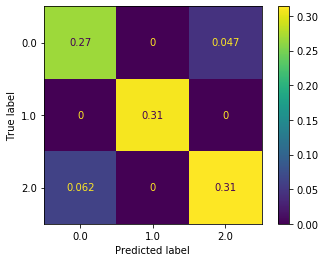

In [44]:
plot_confusion_matrix(gs_MLPC, X_test_scaled, y_test, normalize='all');

<h1> Interpret </h1>

The comparison of all models against our baseline model shows us which model performed the best. This is done by assessing each model's test accuracy. By combining grid search and cross-validataion to fine tune our model, we now are able to accurately classify publicly traded stocks, based on ten principal component analysis instead of the original 29 in the dataset. We can choose from two of our top tuned models that share an accuracy score of 99.1%. 38% of oversold stocks were correctly classified. 60% of overbought stocks were also classified correctly. That gives us about 98% correctly classified based on the confusion matrix. We only have a 1.4% error rate of classification.

In [46]:
pd.concat([scores_df,gs_scores_df, gs_scores_df3]).sort_values(by='Accuracy_Score',ascending=False)

,Model,Accuracy_Score
0,**GS** MLPClassifier,0.903790
5,MLPClassifier,0.895349
0,Baseline SVM,0.891473
0,**GS** SVM,0.890185
1,KNClassifier,0.883721
4,Stacking,0.883721
3,Voting,0.875969
2,AdaBoost,0.802326


In [47]:
predictions_backlog = pd.DataFrame(y_test)

In [48]:
predictions_backlog['Predictions'] = gs_MLPC.predict(X_test_scaled)

In [49]:
len(predictions_backlog)

258

In [50]:
predictions_backlog.sample(frac=.1)

,target,Predictions
478,2.0,2.0
334,0.0,0.0
28,2.0,0.0
912,1.0,1.0
800,0.0,0.0
1143,1.0,1.0
1079,1.0,1.0
155,2.0,2.0
883,1.0,1.0
1282,1.0,1.0


# Recommendations

Below are our recommendations for each category, ie; which stocks are currently oversold, overbought, or neither. We have the total number of stocks classified as each, and suprisingly, none were classified as overbought. 

Target Legend:

* 0 = oversold
* 1 = overbought
* 2 = neither

In [51]:
match = predictions_backlog[predictions_backlog['target'] == predictions_backlog['Predictions']]

Total stocks <b>oversold</b>:

In [52]:
len(match[match['Predictions']  == 0])

69

Taking a random sample of 5%:

In [53]:
match[match['Predictions']  == 0].sample(frac=.05, random_state=123)

,target,Predictions
733,0.0,0.0
800,0.0,0.0
433,0.0,0.0


Total stocks <b>overbought</b>:

In [54]:
len(match[match['Predictions']  == 1])

80

Total stocks <b>neither</b> overbought or oversold:

In [55]:
len(match[match['Predictions']  == 2])

81

Taking a random sample of 5%:

In [56]:
match[match['Predictions']  == 2].sample(frac=.05, random_state=123)

,target,Predictions
145,2.0,2.0
141,2.0,2.0
266,2.0,2.0
399,2.0,2.0


# Future Work

Have you ever asked what buy would yield the highest return? Did you know that we could use the time-series data to build a prediction model for prices? Would you be interested in seeing us build an ARIMA model to predict which "oversold" stock would have the most potential to increase the most? Or even, which stock in the sell zone would potentially decrease the most? <br><br>Another day, another time, but here is my contact information if you would like to set up some more time to discuss

# <center>Jacob Tadesse / DataScience / The Flatiron School <br> My GitHub: https://github.com/cousinskeeta 